In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


grand gaube mu
zinder ne
new norfolk au
mogadishu so
salalah om
atuona pf
shingu jp
punta arenas cl
tawnat ma
mantua cu
lazaro cardenas mx
hithadhoo mv
kirkwall gb
byron bay au
punta arenas cl
atuona pf
bredasdorp za
susanville us
thompson ca
nikolskoye ru
taolanaro mg
necochea ar
kaitangata nz
myskhako ru
hambantota lk
dikson ru
provideniya ru
busselton au
dikson ru
hermanus za
vanimo pg
illoqqortoormiut gl
lata sb
narsaq gl
albany au
albany au
la ronge ca
sorland no
rikitea pf
hobart au
havoysund no
batsfjord no
alice springs au
neuquen ar
hilo us
punta arenas cl
buzdyak ru
punta arenas cl
mataura pf
dhidhdhoo mv
los llanos de aridane es
mahebourg mu
areia branca br
krems at
atuona pf
busselton au
dikson ru
at-bashi kg
butaritari ki
eirunepe br
cape town za
hithadhoo mv
puerto ayora ec
butaritari ki
cabo san lucas mx
rikitea pf
marawi sd
rikitea pf
rikitea pf
vila franca do campo pt
bilibino ru
gorontalo id
cape town za
albany au
barrow us
taolanaro mg
vila franca do campo pt
mys shm

kapaa us
kununurra au
saryshagan kz
mildura au
cabo san lucas mx
mar del plata ar
rikitea pf
marcona pe
hami cn
kapaa us
berdigestyakh ru
pontes e lacerda br
kavieng pg
kamenskoye ru
rikitea pf
clifton us
east london za
albany au
severo-kurilsk ru
mpika zm
atuona pf
upernavik gl
carnarvon au
bredasdorp za
mataura pf
diego de almagro cl
businga cd
fomboni km
ushuaia ar
ajdabiya ly
yellowknife ca
taolanaro mg
asau tv
tautira pf
barrow us
dieppe bay kn
kapaa us
iskateley ru
galiwinku au
vaini to
umzimvubu za
upernavik gl
east london za
daru pg
butaritari ki
hasaki jp
balaguer es
albany au
zelenoborskiy ru
lebu cl
lagos ng
upernavik gl
peniche pt
hithadhoo mv
ilulissat gl
kholm af
mys shmidta ru
burica pa
kapaa us
ust-kulom ru
evensk ru
mataura pf
suluq ly
rikitea pf
amderma ru
tasiilaq gl
constitucion mx
isangel vu
narsaq gl
vaitupu wf
chokurdakh ru
kindu cd
tazovskiy ru
punta arenas cl
castro cl
sorland no
qaanaaq gl
cidreira br
jamestown sh
omboue ga
hobart au
cootamundra au
itarema br


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


626

In [9]:
import requests
requests.__version__


'2.24.0'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q="
# Import the datetime module from the datetime library.
from datetime import datetime


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"


Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 13 | grand gaube
Processing Record 2 of Set 13 | zinder
Processing Record 3 of Set 13 | new norfolk
Processing Record 4 of Set 13 | mogadishu
Processing Record 5 of Set 13 | salalah
Processing Record 6 of Set 13 | atuona
Processing Record 7 of Set 13 | shingu
Processing Record 8 of Set 13 | punta arenas
Processing Record 9 of Set 13 | tawnat
City not found. Skipping...
Processing Record 10 of Set 13 | mantua
Processing Record 11 of Set 13 | lazaro cardenas
Processing Record 12 of Set 13 | hithadhoo
Processing Record 13 of Set 13 | kirkwall
Processing Record 14 of Set 13 | byron bay
Processing Record 15 of Set 13 | bredasdorp
Processing Record 16 of Set 13 | susanville
Processing Record 17 of Set 13 | thompson
Processing Record 18 of Set 13 | nikolskoye
Processing Record 19 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 13 | necochea
Processing Record 21 of Set 13 | kaitangata
Processing Record 22 of Set 13 | myskhako
Processing 

Processing Record 35 of Set 16 | huarmey
Processing Record 36 of Set 16 | faanui
Processing Record 37 of Set 16 | souillac
Processing Record 38 of Set 16 | aracati
Processing Record 39 of Set 16 | ancud
Processing Record 40 of Set 16 | dzhusaly
City not found. Skipping...
Processing Record 41 of Set 16 | chokurdakh
Processing Record 42 of Set 16 | mangrol
Processing Record 43 of Set 16 | naze
Processing Record 44 of Set 16 | makat
Processing Record 45 of Set 16 | nguiu
City not found. Skipping...
Processing Record 46 of Set 16 | sinnamary
Processing Record 47 of Set 16 | castro
Processing Record 48 of Set 16 | geraldton
Processing Record 49 of Set 16 | novaya igirma
Processing Record 50 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 17 | cockburn harbour
City not found. Skipping...
Processing Record 2 of Set 17 | clyde river
Processing Record 3 of Set 17 | sao sepe
Processing Record 4 of Set 17 | vila
Processing Record 5 of Set 17 | shunyi
Processing R

Processing Record 14 of Set 20 | college
Processing Record 15 of Set 20 | moyobamba
Processing Record 16 of Set 20 | muscat
Processing Record 17 of Set 20 | luwuk
Processing Record 18 of Set 20 | ouranopolis
City not found. Skipping...
Processing Record 19 of Set 20 | pangnirtung
Processing Record 20 of Set 20 | marsh harbour
Processing Record 21 of Set 20 | husavik
Processing Record 22 of Set 20 | kununurra
Processing Record 23 of Set 20 | saryshagan
City not found. Skipping...
Processing Record 24 of Set 20 | mildura
Processing Record 25 of Set 20 | marcona
City not found. Skipping...
Processing Record 26 of Set 20 | hami
Processing Record 27 of Set 20 | berdigestyakh
Processing Record 28 of Set 20 | pontes e lacerda
Processing Record 29 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 20 | clifton
Processing Record 31 of Set 20 | mpika
Processing Record 32 of Set 20 | diego de almagro
Processing Record 33 of Set 20 | businga
Processing Record 34 of Set 

Processing Record 46 of Set 23 | mezhdurechenskiy
Processing Record 47 of Set 23 | manokwari
Processing Record 48 of Set 23 | port arthur
Processing Record 49 of Set 23 | baruun-urt
Processing Record 50 of Set 23 | waipawa
Processing Record 1 of Set 24 | saint-paul
Processing Record 2 of Set 24 | rolim de moura
City not found. Skipping...
Processing Record 3 of Set 24 | viligili
City not found. Skipping...
Processing Record 4 of Set 24 | baley
Processing Record 5 of Set 24 | alugan
Processing Record 6 of Set 24 | chabahar
Processing Record 7 of Set 24 | elista
Processing Record 8 of Set 24 | karasburg
Processing Record 9 of Set 24 | dunedin
Processing Record 10 of Set 24 | ostrovnoy
Processing Record 11 of Set 24 | pisco
Processing Record 12 of Set 24 | svetlogorsk
Processing Record 13 of Set 24 | neepawa
Processing Record 14 of Set 24 | savinka
Processing Record 15 of Set 24 | merauke
Processing Record 16 of Set 24 | santa lucia
Processing Record 17 of Set 24 | jasper
Processing Recor

In [14]:
len(city_data)

560

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Gaube,-20.01,57.66,75.00,73,12,3.00,MU,2020-10-04 18:41:44
1,Zinder,13.81,8.99,91.40,41,0,4.70,NE,2020-10-04 18:41:44
2,New Norfolk,-42.78,147.06,44.01,91,100,1.99,AU,2020-10-04 18:41:44
3,Mogadishu,2.04,45.34,79.54,83,0,14.58,SO,2020-10-04 18:40:36
4,Salalah,17.02,54.09,77.00,94,40,3.36,OM,2020-10-04 18:41:45
5,Atuona,-9.80,-139.03,77.54,75,0,18.19,PF,2020-10-04 18:41:45
6,Shingu,33.73,135.98,68.16,87,89,4.65,JP,2020-10-04 18:40:35
7,Punta Arenas,-53.15,-70.92,53.60,54,75,28.86,CL,2020-10-04 18:41:46
8,Mantua,45.17,10.78,60.01,90,100,7.00,IT,2020-10-04 18:41:47
9,Lazaro Cardenas,17.96,-102.20,87.19,58,0,5.19,MX,2020-10-04 18:41:47


In [16]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2020-10-04 18:41:44,-20.01,57.66,75.00,73,12,3.00
1,Zinder,NE,2020-10-04 18:41:44,13.81,8.99,91.40,41,0,4.70
2,New Norfolk,AU,2020-10-04 18:41:44,-42.78,147.06,44.01,91,100,1.99
3,Mogadishu,SO,2020-10-04 18:40:36,2.04,45.34,79.54,83,0,14.58
4,Salalah,OM,2020-10-04 18:41:45,17.02,54.09,77.00,94,40,3.36
5,Atuona,PF,2020-10-04 18:41:45,-9.80,-139.03,77.54,75,0,18.19
6,Shingu,JP,2020-10-04 18:40:35,33.73,135.98,68.16,87,89,4.65
7,Punta Arenas,CL,2020-10-04 18:41:46,-53.15,-70.92,53.60,54,75,28.86
8,Mantua,IT,2020-10-04 18:41:47,45.17,10.78,60.01,90,100,7.00
9,Lazaro Cardenas,MX,2020-10-04 18:41:47,17.96,-102.20,87.19,58,0,5.19


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'10/05/20'

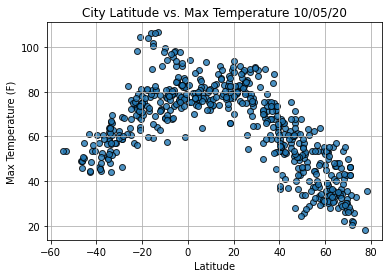

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


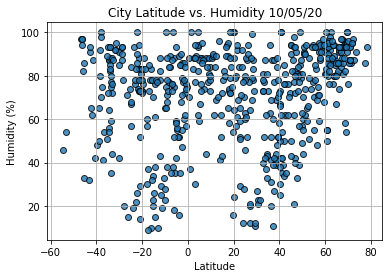

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


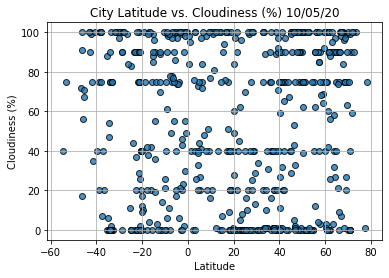

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


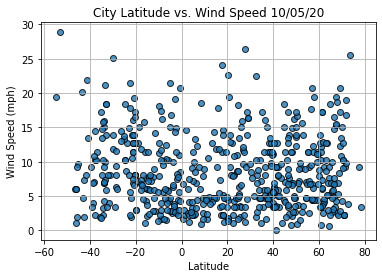

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


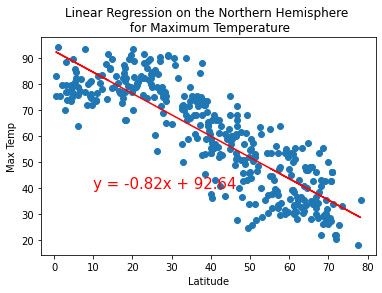

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


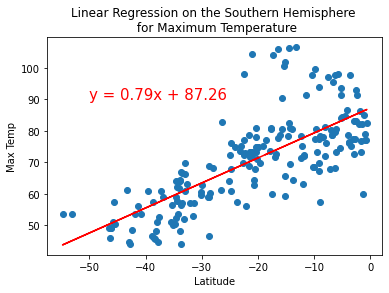

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

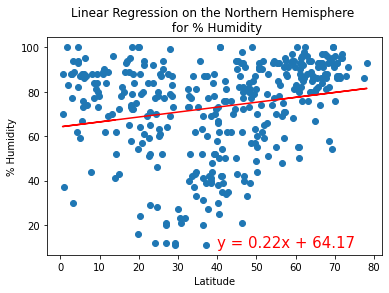

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


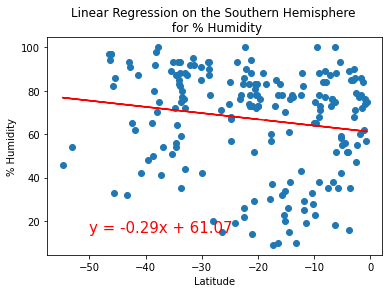

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


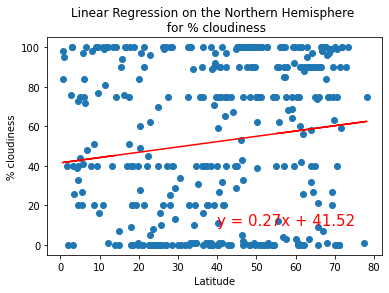

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% cloudiness',(40,10))


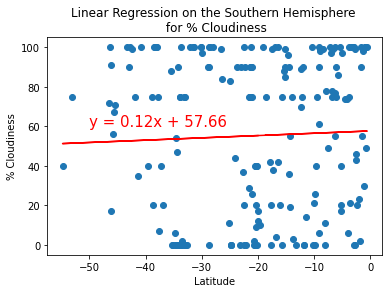

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


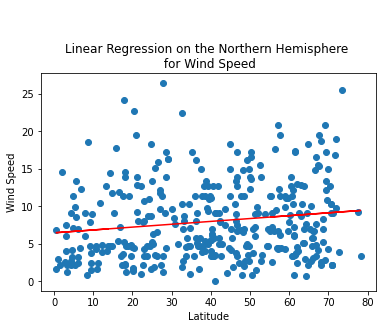

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


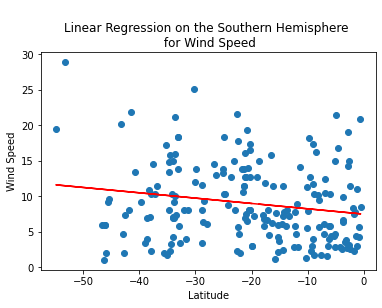

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
